In [1]:
import cv2
import matplotlib.pyplot as plt
from cv2 import CascadeClassifier
from matplotlib.patches import Rectangle

<img src="/Users/ismailsmac/code/Ismail-ai707/student-challenges/curriculum/08-Deep-Learning/05-Face-Recognition/01-Challenges/01-Face-Detection/src/Trump-baseball.jpg" alt="Trump playing baseball" width="800" style="display: block; margin-left: auto; margin-right: auto;">

(-0.5, 1439.5, 906.5, -0.5)

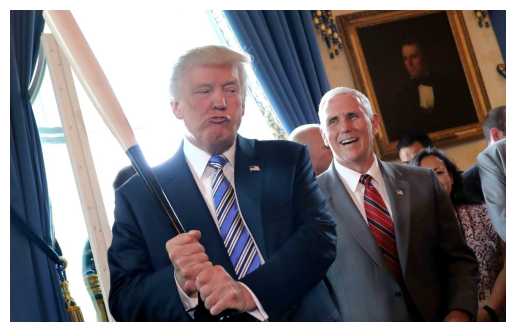

In [2]:
trump_img = cv2.imread('./Trump-baseball.jpg')
trump_img_rgb = cv2.cvtColor(trump_img, cv2.COLOR_BGR2RGB) 
plt.imshow(trump_img_rgb)
plt.axis('off')
# plt.show()

For face detection i'll be using haarcascades algorithm (default one).

More information is available [here](https://github.com/opencv/opencv/blob/4.x/data/haarcascades/haarcascade_frontalface_default.xml) on OpenCV official repo

In [3]:
# Initiate a classifier
FACE_CASCADE_PATH = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml' # you can also try 'haarcascade_frontalface_alt2.xml' for example
face_cascade = CascadeClassifier(FACE_CASCADE_PATH)

Apply the classifier to the input image using the method `detectMultiScale`

In [4]:
# Apply the classifier to your image
faces = face_cascade.detectMultiScale(trump_img, scaleFactor=1.3)
print(faces)

[[ 515  165  178  178]
 [1126  114   72   72]
 [ 882  253  177  177]]


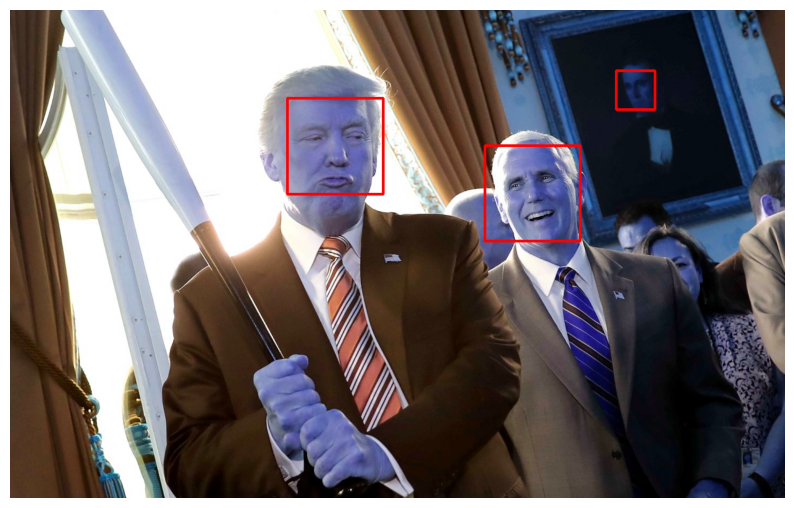

In [5]:
# Loop over each found face
for (x, y, w, h) in faces: 
    # Draw a box around the faces
    cv2.rectangle(trump_img, (x, y), (x+w, y+h), (255, 0, 0), 3)
    
# Display the result
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(trump_img, cmap='gray')
plt.show()

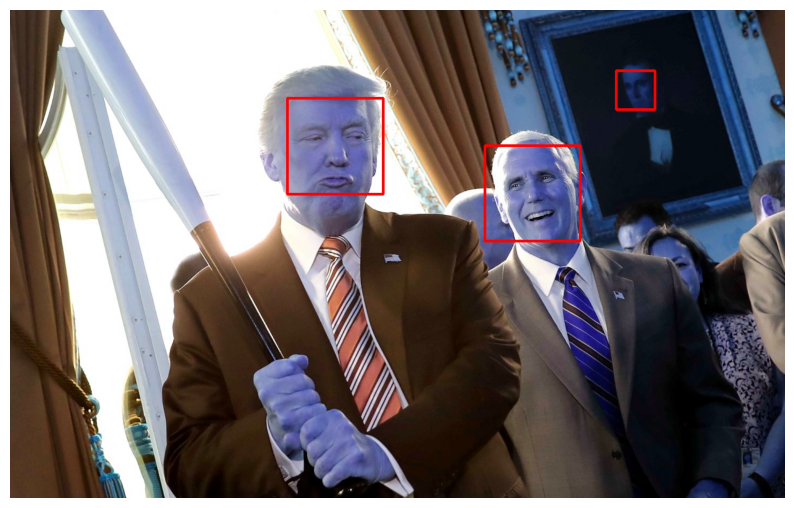

In [6]:
# Image with bounding boxes using matplotlib.patches.Rectangle
faces = face_cascade.detectMultiScale(trump_img, scaleFactor=1.3)

# Loop over each found face
for (x, y, w, h) in faces: 
    # Draw a box around the faces
    Rectangle((x, y), w, h)
    
# Display the result
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(trump_img, cmap='gray')
plt.show()

In [7]:
def plot_rectangle(img):
    """
    Detects faces in the image and draws bounding boxes around them.

    Args:
        img (numpy.ndarray): The image in which to detect faces.

    Returns:
        plot of rectangle
    """
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Load the pre-trained Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Draw bounding boxes around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

Stopping program


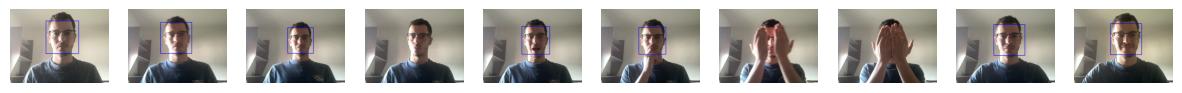

In [8]:
# Initialize the webcam
cap = cv2.VideoCapture(0, cv2.CAP_ANY)
cap.set(3, 640)  # Set width
cap.set(4, 480)  # Set height
cap.set(10, 100)  # Set brightness

# List to store captured frames
captured_frames = []
frame_interval = 20  # Save a frame every 30 frames
frame_count = 0

while True:
    success, img = cap.read()
    if success:
        # Detect faces and draw bounding boxes
        plot_rectangle(img)
        
        # Display the image with bounding boxes
        cv2.imshow("video", img)
        
        # Save frames at regular intervals
        if frame_count % frame_interval == 0:
            captured_frames.append(img.copy())
        
        frame_count += 1
        
        # Break the loop if the space key is pressed
        if cv2.waitKey(1) & 0xFF == ord(' '):
            print("Stopping program")
            break
    else:
        print("Failed to capture image")
        break

# Release the capture and close the window (using space key)
cap.release()
cv2.destroyAllWindows()

# Plot the captured frames
fig, axes = plt.subplots(1, len(captured_frames), figsize=(15, 5))
for ax, frame in zip(axes, captured_frames):
    ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    ax.axis('off')
plt.show()

If you want even more, be aware that you can detect the eyes and the mouth using the same method. All you have to do is use the right XML file when instantiating your `CascadeClassifier`.